# Implementing linear regression using python (from scratch).

Installing necessary packages

In [5]:
!pip install -r requirement.txt

In [386]:
import csv
import numpy as np
import matplotlib.pyplot as plt

Loading data

In [387]:
csv_file = open('ex1data1.txt')
data = np.array(list(csv.reader(csv_file, delimiter=','))).astype(np.float)

In [388]:
data.shape

(97, 2)

In [389]:
X1 = data[:, 0]
Y = data[:, 1]
m = len(Y)

In [390]:
X1

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [391]:
Y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [392]:
m

97

In [393]:
%matplotlib inline

plotting data using matplotlib

Text(0, 0.5, 'Price')

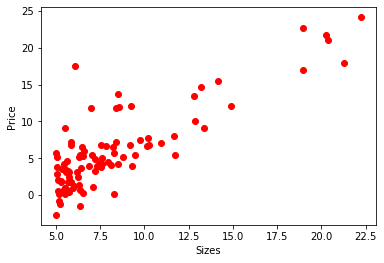

In [394]:
plt.plot(X1, Y, 'ro')
# plt.axis([-2, 30, -2, 30])
plt.xlabel('Sizes')
plt.ylabel('Price')

In [395]:
X0 = np.repeat(1, m)
X0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [396]:
print(X0.shape)
print(X1.shape)

(97,)
(97,)


In [397]:
X = np.array([list(X0), list(X1)])
X = X.transpose()
X[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [398]:
X.shape

(97, 2)

In [399]:
iterations = 1500
alpha = 0.01

### Let's test our cost function with theta equals to [0, 0].

In [400]:
theta_one = np.repeat(0, 2)
theta_one

array([0, 0])

### Cost Function

In [401]:
def computeCost(x, y, theta):
    m = len(y)
    return (1/(2*m))*np.sum(pow((np.dot(x, theta)-y), 2))

In [402]:
J = computeCost(X, Y, theta_one)
J

32.072733877455676

### Let's test our cost function with theta equals to [1, 2].

In [403]:
theta_two = np.array([1, 2])
J = computeCost(X, Y, theta_two)
J

75.20338497891959

### Gradient Descent algorithm

In [404]:
def gradientDescent(x, y, theta, alpha, num_iters):
    all_theta = []
    m = len(y)
    j = np.array([])
    i = 0
    for i in range(num_iters):
        t = np.dot(x, theta)
        d = t - y
        dj = (np.dot(x.T, d))/m
        theta = theta - alpha*dj
        all_theta.append(list(theta))
        j = np.append(j, computeCost(x, y, theta))
    return [theta, j, all_theta]

In [405]:
theta, Js, all_theta = gradientDescent(X, Y, theta_two, alpha, iterations)

In [406]:
theta

array([-3.57746121,  1.16105498])

In [407]:
Js

array([8.70755848, 6.59911918, 6.52533071, ..., 4.48626298, 4.48622951,
       4.48619616])

### Plotting our Cost function J

In [408]:
all_theta = np.array(all_theta)
all_theta

array([[ 0.88519535,  0.94361164],
       [ 0.85773792,  0.75653289],
       [ 0.84582033,  0.72398409],
       ...,
       [-3.5763105 ,  1.16093938],
       [-3.57688638,  1.16099723],
       [-3.57746121,  1.16105498]])

Text(0, 0.5, 'J')

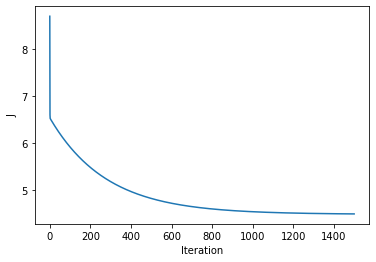

In [409]:
plt.plot(range(iterations), Js, '-')
plt.xlabel('Iteration')
plt.ylabel('J')

In [410]:
Js.shape

(1500,)

In [411]:
all_theta.shape

(1500, 2)

In [412]:
X@theta - Y

array([-14.07529917,  -6.28969759,  -7.34889825,  -7.30036097,
        -3.59721124,  -5.73045341,   0.75475025,  -5.61781548,
        -2.6453264 ,  -1.52539271,  -0.19922453,  -2.63727846,
        -0.07507195,  -1.04064651,   2.25552162,  -0.84458205,
        -1.49168184,   1.81809694,   0.23585789,  -0.75717365,
         0.46982417,  -1.80987675,  -1.46615326,  -1.4200113 ,
        -0.19880635,  -4.2192746 ,  -2.18444792,   2.09751821,
        -2.97140078,  -1.94555747,   3.74086397,  -1.92340552,
        -4.97379254,   1.41374252,  -0.58652266,   1.07135237,
         1.70592381,  -0.46103867,   1.20884052,  -1.6982145 ,
         2.14367696,   0.50199969,   4.63077051,   0.68552193,
        -1.2243543 ,   3.61171787,  -2.82438025,   1.31428315,
         2.00258207,   1.83874107,  -1.57327445,   0.74547031,
         0.75359486,   0.25205591,   2.35196777,   5.22667131,
         1.23162995,  -1.63365944,   3.26979287,   1.98458816,
         1.49991342,   3.17878085,   3.19962773,   1.67

### Plotting data and our hypothesis

plt.plot(X1, Y, 'ro')
plt.xlabel('Sizes')
plt.ylabel('Price')
plt.plot(X1, np.dot(X, theta), '-')

### Test of our prediction model

##### Predict values for population sizes of 35,000 and 70,000

In [413]:
predict1 = [1, 3.5000]@theta
predict1

0.486231219921621

In [414]:
predict2 = [1, 7]@theta
predict2

4.549923654023457

#### By El Houcine ES SANHAJI

# Thank you